In [2]:
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from PIL import Image


## Pupil Function

In [3]:
from scipy import ndimage, misc
def create_angle_split(image_size, h, w, ho, wo, angle):
    arr = np.zeros((image_size,image_size))
    half = image_size//2
    arr[half+ho-h:half+h+ho, half-w+wo:half+w+wo] = 1
    arr = ndimage.rotate(arr, angle, order=1, reshape=False)
    arr[arr>0]=1
    
    return arr

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

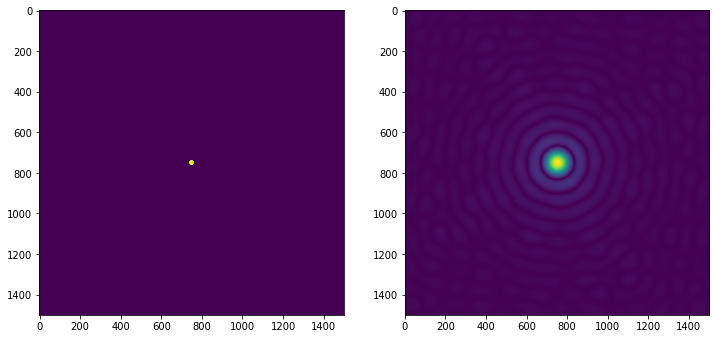

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))
aprtr = np.asarray(Image.open("aperture5.jpg")) / 255.0
ax1.imshow(aprtr)

afft = np.abs(np.fft.fft2(np.round(aprtr).astype(float)))
ax2.imshow(np.fft.fftshift(afft))

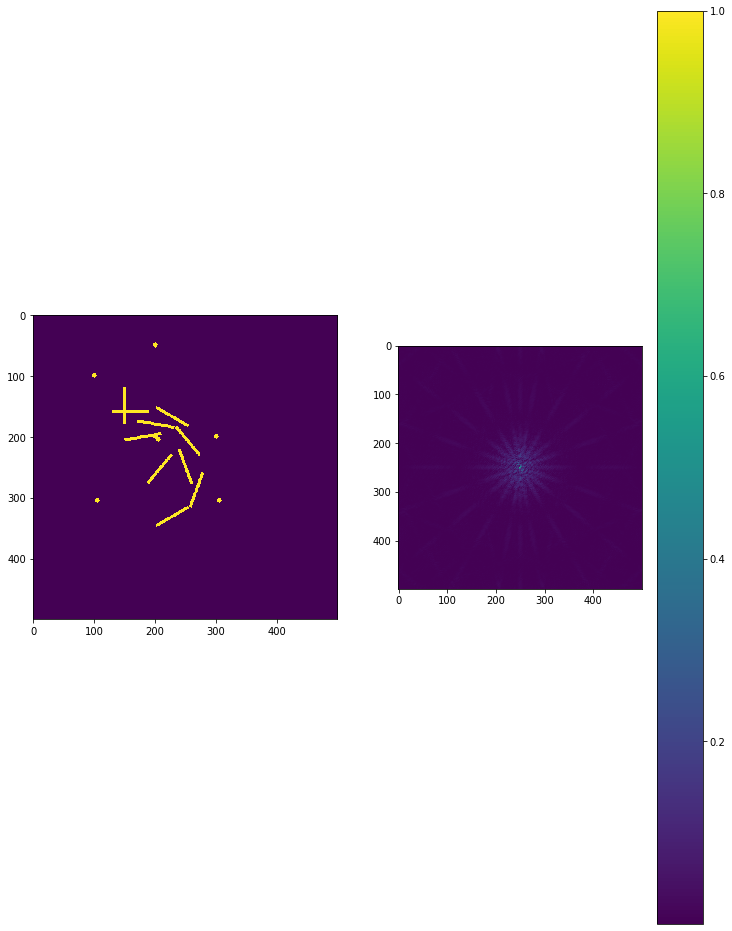

In [5]:
imsz = 500 
h = 30
w = 2
arr1 = create_angle_split(imsz, h, w, 0, 0, 20)
arr2 = create_angle_split(imsz, h, w, 30, 30, -20)
arr3 = create_angle_split(imsz, h, w, -30, 30, 40)
arr4 = create_angle_split(imsz, h, w, 30, -30, -40)
arr5 = create_angle_split(imsz, h, w, -60, 60, 60)
arr6 = create_angle_split(imsz, h, w, 60, 60, -60)
arr7 = create_angle_split(imsz, h, w, -60, 60, 80)
arr8 = create_angle_split(imsz, h, w, 60, -60, -80)
arr9 = create_angle_split(imsz, h, w, 90, -90, -90)
arr0 = create_angle_split(imsz, h, w, 100, 100, 180)
c = create_circular_mask(imsz, imsz, radius=4, center=(200, 50))
c += create_circular_mask(imsz, imsz, radius=4, center=(200, 200))
c += create_circular_mask(imsz, imsz, radius=4, center=(205, 205))
c += create_circular_mask(imsz, imsz, radius=4, center=(100, 100))
c += create_circular_mask(imsz, imsz, radius=4, center=(105, 305))
c += create_circular_mask(imsz, imsz, radius=4, center=(300, 200))
c += create_circular_mask(imsz, imsz, radius=4, center=(305, 305))

arr = arr1 + arr2 + arr3 + arr4 + arr5 + arr6 + arr7 + arr8 + arr9 + arr0 + c
arr[arr>0] = 1
arr_fft = np.abs(np.fft.fft2(arr.astype(float))) 
arr_fft = arr_fft / np.max(arr_fft)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))
ax1.imshow(arr)
im = ax2.imshow(np.fft.fftshift(arr_fft))
fig.colorbar(im)

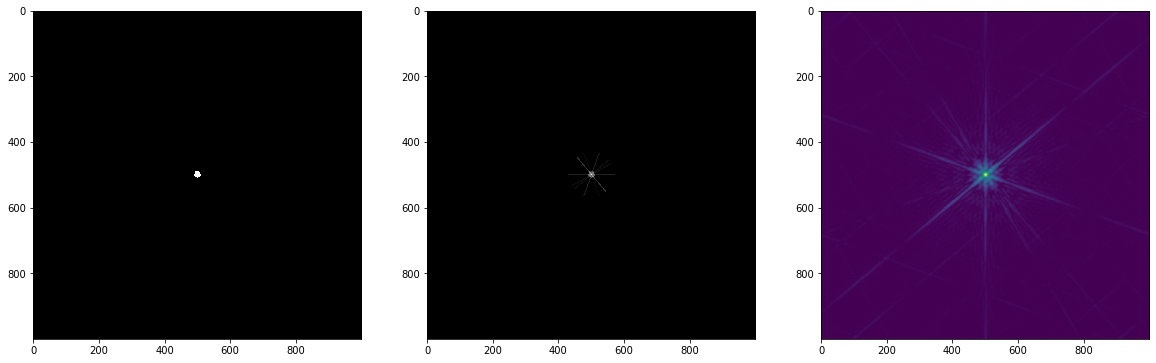

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 54))

image = np.asarray(Image.open("pentbig6.jpg")) / 255.0
ax1.imshow(np.round(image), cmap="gray")

ims = 1000
h = 70
w = 1
im2 = image + create_angle_split(ims, h, w, 0, 0, 20) * 6
im2 += create_angle_split(ims, h, w, 0, 0, -20) * 20
im2 += create_angle_split(ims, h, w, 0, 0, 40) * 30
im2 += create_angle_split(ims, h, w, 0, 0, -50) * 10
im2 += create_angle_split(ims, h, w, 0, 0, 90) * 20
im2 += create_angle_split(ims, h, w, 0, 0, -60) * 10
im2 += image * 50

ax2.imshow(np.round(im2), cmap="gray")

arr = np.abs(np.fft.fft2(np.round(im2).astype(float)))
ax3.imshow(np.fft.fftshift(arr))


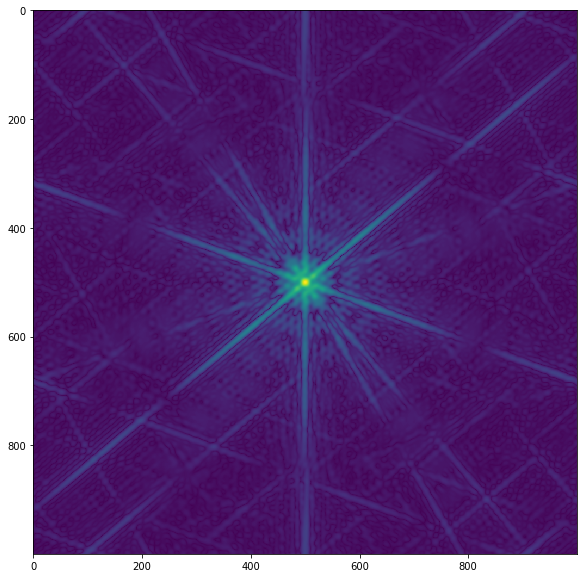

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(np.sqrt(np.fft.fftshift(arr)))

(1.0, 0.0)

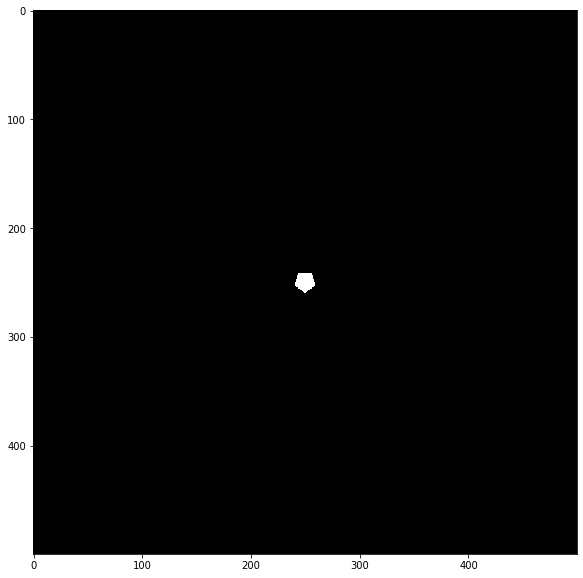

In [8]:
image = np.asarray(Image.open("pent3.jpg")) / 255.0
plt.figure(figsize=(10,10))
plt.imshow(np.round(image), cmap="gray")
np.max(image), np.min(image)

(112.0, 0.0)

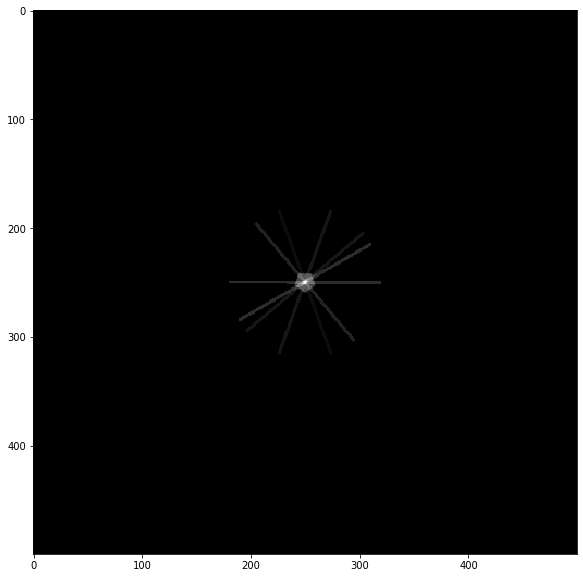

In [9]:
h = 70
w = 1
im2 = image + create_angle_split(500, h, w, 0, 0, 20) * 6
im2 = im2 + create_angle_split(500, h, w, 0, 0, -20) * 10
im2 = im2 + create_angle_split(500, h, w, 0, 0, 40) * 15
im2 = im2 + create_angle_split(500, h, w, 0, 0, -50) * 10
im2 = im2 + create_angle_split(500, h, w, 0, 0, 90) * 20
im2 = im2 + create_angle_split(500, h, w, 0, 0, -60) * 20
im2 += image * 30
# im2 = np.max(im2)"" - im2
# print(np.max(im2))
# im2 = im2 + create_angle_split(500, 30, w, 0, 0, 70)
# im2 = im2 + create_angle_split(500, 30, w, -30, -30, -20)
plt.figure(figsize=(10,10))
plt.imshow(np.round(im2), cmap="gray")
np.max(im2), np.min(im2)

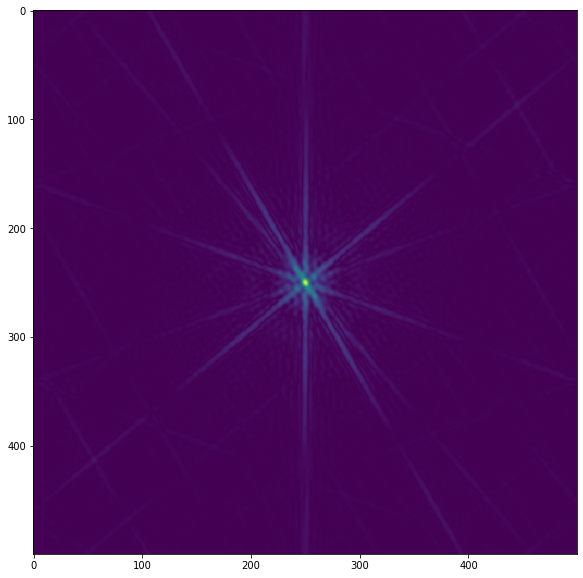

In [10]:
plt.figure(figsize=(10,10))
arr = np.abs(np.fft.fft2(np.round(im2).astype(float)))
plt.imshow(np.fft.fftshift(arr))

[1.57440696e-04 1.57440696e-04 3.22948559e-04 ... 1.27858725e+01
 1.27858725e+01 1.33559348e+01]


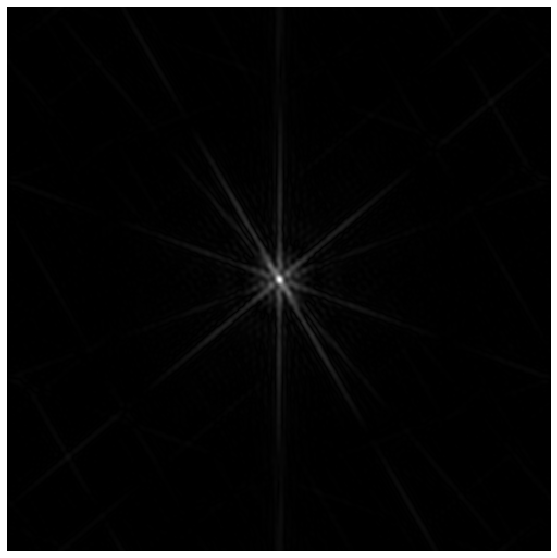

In [14]:
plt.figure(figsize=(10,10))
t = np.fft.fftshift(arr) * 550e-9
tr = np.repeat(np.expand_dims(t, axis=2), 3, axis=2)

im2p = im2.astype("complex64") * create_df_phase(500, 550e-9, 500, 1)
arr2 = np.abs(np.fft.fft2(im2p))
s = np.fft.fftshift(arr2) * 750e-9
sr = np.repeat(np.expand_dims(s, axis=2), 3, axis=2)

lambda550 = np.array([1, 1, 1]) * 255;
lambda0 = np.array([1, 1, 1]) * 255;

trgb = tr * lambda550 + sr * lambda0
print(np.unique(trgb))
plt.imshow((trgb * (255.0 / np.max(trgb))).astype(np.uint8))
plt.axis('off')
plt.savefig("/home/aatifjiwani/Downloads/test.png", bbox_inches='tight')
# plt.colorbar()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
False True


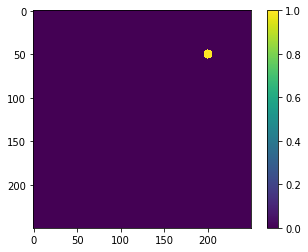

In [160]:
aperature_function = create_circular_mask(250, 250, radius=5, center=(200, 50))
print(aperature_function)
# aperature_function = np.zeros((250,250))
# aperature_function[100:150, 120:130] = 1

print(np.min(aperature_function), np.max(aperature_function))
plt.imshow(aperature_function.astype(np.uint8))
plt.colorbar()

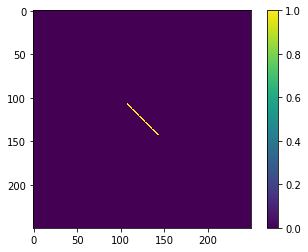

In [170]:
slit = create_angle_split(250, 250, 2, 200)
plt.imshow(slit.astype(np.uint8))
plt.colorbar()

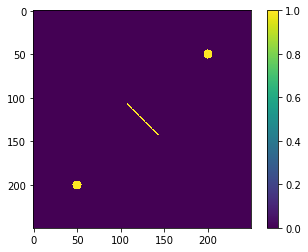

In [171]:
circle_slit = aperature_function + slit + create_circular_mask(250, 250, radius=5, center=(50, 200))
plt.imshow(circle_slit.astype(np.uint8))
plt.colorbar()

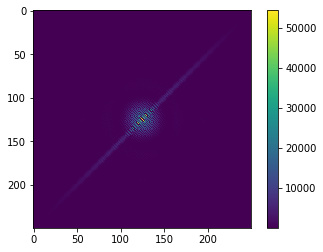

In [172]:
circle_fourier = np.abs(np.fft.fft2(circle_slit.astype(float))) ** 2
plt.imshow(np.fft.fftshift(circle_fourier))
plt.colorbar()

In [12]:
origin = (200, 100)
depth = 300

def create_phase_matrix(width, lr_shift, ud_shift):
    k = np.arange(-width//2, width//2) * (1.0 / width)
    kx, ky = np.meshgrid(k, k)

    return np.exp(1j * 2 * np.pi * (kx * lr_shift + ky * ud_shift)).astype('complex')

def create_df_phase(width, wavelength, R, z0):
    wavenumber = 2 * np.pi / wavelength
    wv550 = 2 * np.pi / 550.0e-9
    
    k = np.arange(-width//2, width//2) * (1.0 / width)
    kx, ky = np.meshgrid(k, k)
    
    r_xy = np.sqrt(kx * kx + ky * ky) / R
    
    W_m = np.random.normal(0, 5 / wv550, 1)
    
    return np.exp(1j * np.pi)
    
    
    

(1.0, 0.0)

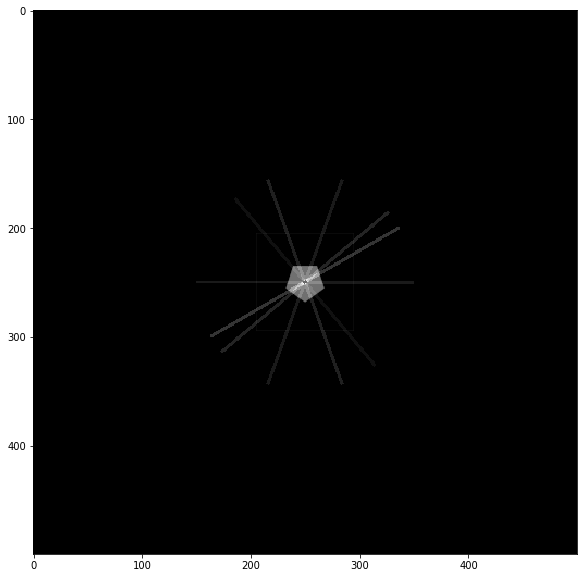

In [564]:
plt.figure(figsize=(10,10))
plt.imshow(np.round(im2), cmap="gray")
np.max(image), np.min(image)

<Figure size 720x720 with 0 Axes>

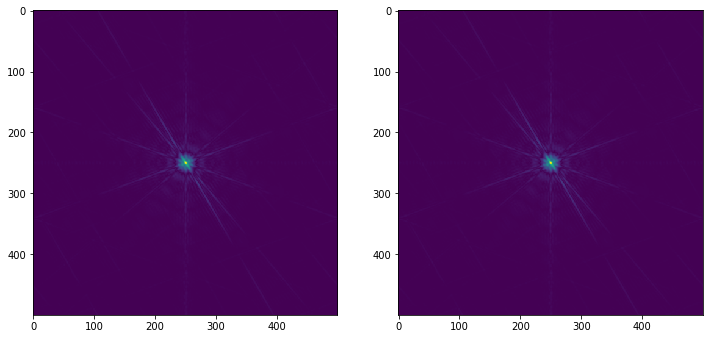

In [622]:
plt.figure(figsize=(10,10))
im2p = im2.astype("complex64")
arr = np.abs(np.fft.fft2(im2p))
arr = arr / np.max(arr)

im2p = im2.astype("complex64") * create_df_phase(500, 550e-9, 500, 1)
arr2 = np.abs(np.fft.fft2(im2p))
arr2 = arr2 / np.max(arr2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))

ax1.imshow(np.fft.fftshift(arr))
ax2.imshow(np.fft.fftshift(arr2))

In [465]:
np.random.normal(0, 1, 1)

array([-0.38961137])

class:  ndarray
shape:  (250, 250)
strides:  (4000, 16)
itemsize:  16
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x891cbe0
byteorder:  little
byteswap:  False
type: complex128


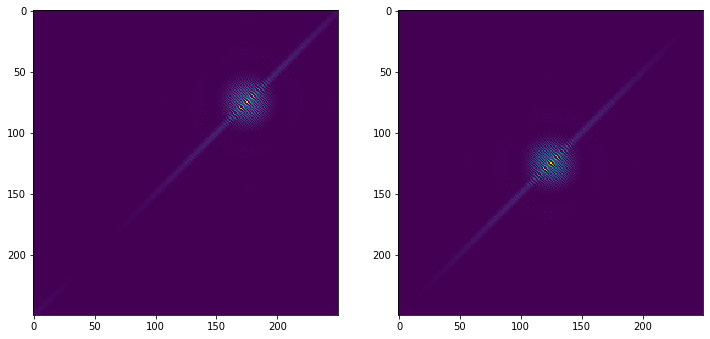

In [173]:
phase = create_phase_matrix(250,50,-50)
pupil_func = circle_slit.astype(np.complex64) * phase

np.info(pupil_func)


t = np.abs(np.fft.fft2(pupil_func)) ** 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 24))

ax1.imshow(np.fft.fftshift(t))
ax2.imshow(np.fft.fftshift(circle_fourier))

## Spectral Response Function

In [280]:
from scipy.stats import norm

In [281]:
wavelengths = np.arange(380, 745, 5)

In [282]:
mu_R = np.random.uniform(620, 640, 1)
mu_G = np.random.uniform(540, 560, 1)
mu_B = np.random.uniform(460, 480, 1)

sigma_R = np.random.uniform(50, 60, 1)
sigma_G = np.random.uniform(50, 60, 1)
sigma_B = np.random.uniform(50, 60, 1)

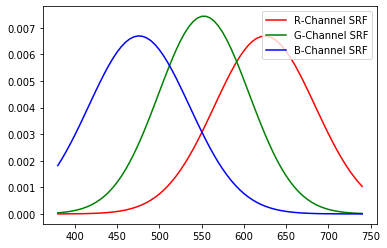

In [283]:
# Example SRF
plt.plot(wavelengths, norm.pdf(wavelengths, mu_R, sigma_R), color='r', label='R-Channel SRF')
plt.plot(wavelengths, norm.pdf(wavelengths, mu_G, sigma_G), color='g', label='G-Channel SRF')
plt.plot(wavelengths, norm.pdf(wavelengths, mu_B, sigma_B), color='b', label='B-Channel SRF')
plt.legend()

In [284]:
SRF_R = norm.pdf(wavelengths, mu_R, sigma_R)[None, :]
SRF_G = norm.pdf(wavelengths, mu_G, sigma_G)[None, :]
SRF_B = norm.pdf(wavelengths, mu_B, sigma_B)[None, :]

In [285]:
SRF = np.concatenate((SRF_R, SRF_G, SRF_B), axis=0)
SRF.shape

(3, 73)

## Combining

In [558]:
pupil_fourier = np.fft.fftshift(arrf)
psf = np.repeat(np.expand_dims(pupil_fourier, axis=0), 73, axis=0)
psf = psf.reshape(73, -1)

In [559]:
psf_rgb = (SRF @ psf)

In [560]:
psf_rgb = psf_rgb.reshape(3, 500, 500)

In [554]:
psf_rgb = psf_rgb / np.max(psf_rgb)

In [561]:
psf_rgb

array([[[15.73368858, 13.9918029 , 10.56732621, ...,  9.31940772,
         10.56732621, 13.9918029 ],
        [14.81417513, 15.5705332 , 12.3245759 , ..., 11.97367327,
          9.54603312, 11.44485589],
        [12.55169512, 16.10080984, 15.37113965, ..., 13.34637627,
          8.63126966,  8.61809118],
        ...,
        [10.11446096,  7.25389842,  8.92636322, ..., 16.31745763,
         17.96668461, 15.18799346],
        [12.55169512,  8.61809118,  8.63126966, ..., 11.11897914,
         15.37113965, 16.10080984],
        [14.81417513, 11.44485589,  9.54603312, ...,  8.17505629,
         12.3245759 , 15.5705332 ]],

       [[16.11183533, 14.3280848 , 10.82130353, ...,  9.54339231,
         10.82130353, 14.3280848 ],
        [15.1702221 , 15.94475864, 12.62078733, ..., 12.26145103,
          9.77546447, 11.71992394],
        [12.85336517, 16.48778006, 15.74057283, ..., 13.66714586,
          8.83871539,  8.82522017],
        ...,
        [10.35755402,  7.42824013,  9.14090129, ..., 1

In [556]:
psf_rgb.shape

(3, 500, 500)

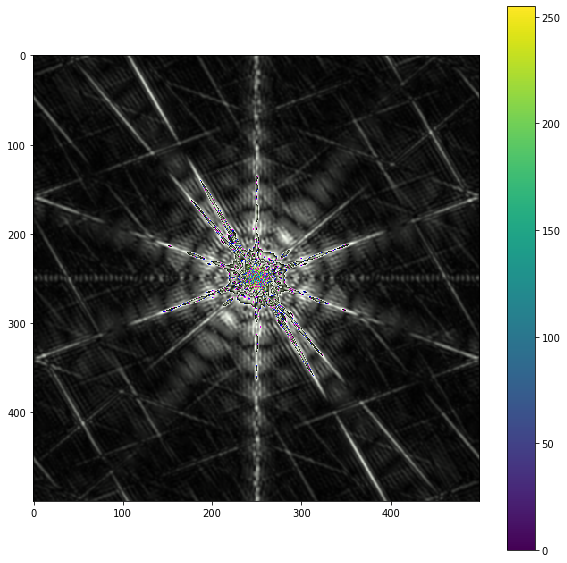

In [562]:
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(psf_rgb.astype(np.uint8), (1, 2, 0)))
plt.colorbar()